In [1]:
from openai import OpenAI
client = OpenAI()

In [25]:
import json
from tqdm import tqdm
from pprint import pprint
from collections import defaultdict

In [3]:
filename = "fine_tune_dataset.jsonl"

In [19]:
data = []
with open(filename, "r") as f:
    for line in f:
        data.append(line)

In [20]:
response = client.moderations.create(
    model="omni-moderation-latest",
    input=data,
)

In [26]:
total_scores = defaultdict(float)

In [27]:
for datum, result in zip(data, response.results):
    if result.flagged:
        print(datum)
        print(result)
        print()
    for category, score in dict(result.category_scores).items():
        total_scores[category] += score

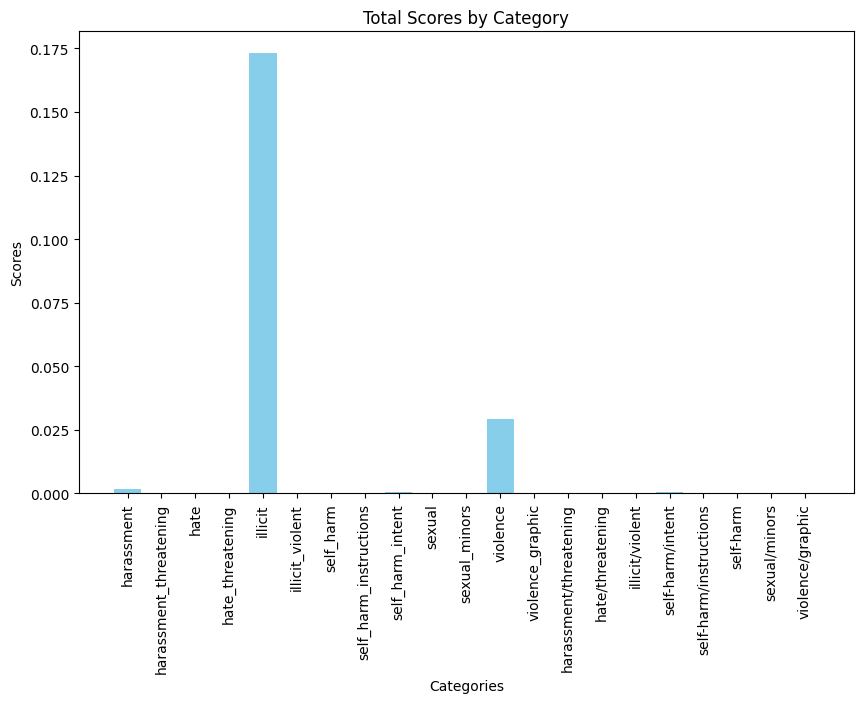

In [29]:
import matplotlib.pyplot as plt

# Extract categories and scores from the total_scores dictionary
categories = list(total_scores.keys())
scores = list(total_scores.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, scores, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Scores')
plt.title('Total Scores by Category')
plt.xticks(rotation=90)
plt.show()

In [30]:
response = client.moderations.create(
    model="omni-moderation-latest",
    input="\n".join(data),
)
response

ModerationCreateResponse(id='modr-56220aeda05ba68c02ed6ace4a0ee3bb', model='omni-moderation-latest', results=[Moderation(categories=Categories(harassment=False, harassment_threatening=False, hate=False, hate_threatening=False, illicit=False, illicit_violent=False, self_harm=False, self_harm_instructions=False, self_harm_intent=False, sexual=False, sexual_minors=False, violence=False, violence_graphic=False, harassment/threatening=False, hate/threatening=False, illicit/violent=False, self-harm/intent=False, self-harm/instructions=False, self-harm=False, sexual/minors=False, violence/graphic=False), category_applied_input_types=CategoryAppliedInputTypes(harassment=['text'], harassment_threatening=['text'], hate=['text'], hate_threatening=['text'], illicit=['text'], illicit_violent=['text'], self_harm=['text'], self_harm_instructions=['text'], self_harm_intent=['text'], sexual=['text'], sexual_minors=['text'], violence=['text'], violence_graphic=['text'], harassment/threatening=['text'], 

In [32]:
response.results[0].flagged

False

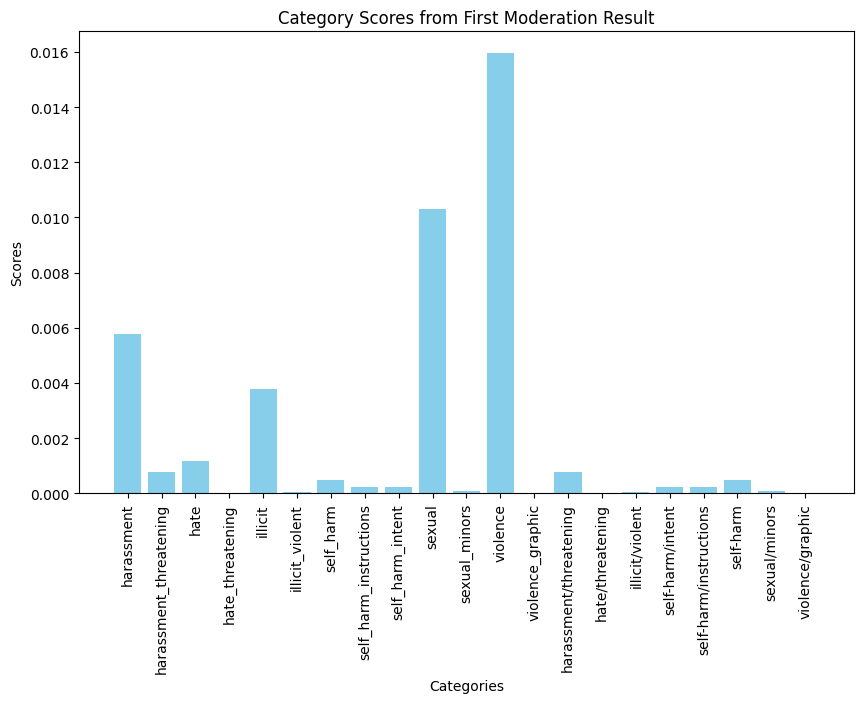

In [33]:
import matplotlib.pyplot as plt

# Extract category scores from the first result in the response
category_scores = dict(response.results[0].category_scores)

# Extract categories and scores
categories = list(category_scores.keys())
scores = list(category_scores.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(categories, scores, color='skyblue')
plt.xlabel('Categories')
plt.ylabel('Scores')
plt.title('Category Scores from First Moderation Result')
plt.xticks(rotation=90)
plt.show()